## Statsmodels library : 

In [1]:
# helps conducting statistical tests and statistical data exploration.
# Agenda:
# - Intro
# - ETS Decomposition
# - Moving Averages
# - Holt Winters Methods

In [2]:
# Time series has trends(up/down/flat), it may also have Seasonality(i.e. 
# repeating trends), Cyclical (trends with no set repetition,or may be very long)

### Hodrick Prescott filter:

In [3]:
# Hodrick Prescott filter seperates a time series(y_t) into a trend comp(T_t) and
# cyclic component(c_t)
# y_t = T_t + c_t
# The components are determined by minimizing the quadratic loss function,
# where lambda is a smoothing parameter which handles the growth rate of trend component.
# Note: we have some recommended default values for lambda:
# quarterly data - 1600, annual - 6.25, monthly - 129600


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\shaleens\\Desktop\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\macrodata.csv', index_col=0, parse_dates=True)

FileNotFoundError: [Errno 2] File C:\Users\shaleens\Desktop\TimeSeriesUdacity\TS Udemy Vids\Time Series 2\macrodata.csv does not exist: 'C:\\Users\\shaleens\\Desktop\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\macrodata.csv'

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,,,
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


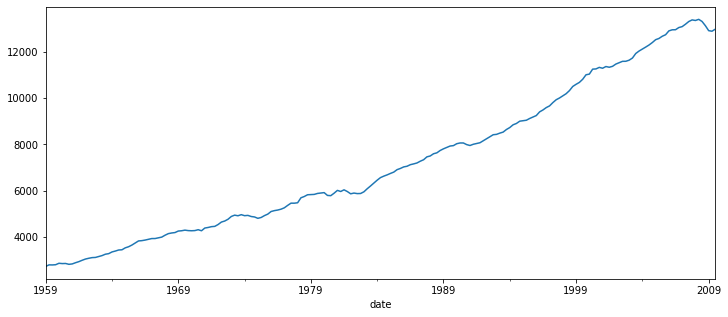

In [8]:
df['realgdp'].plot(figsize=(12,5))

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [11]:
gdp_cyc, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [12]:
type(gdp_trend)

pandas.core.series.Series

In [14]:
df['gdp_trend'] = gdp_trend

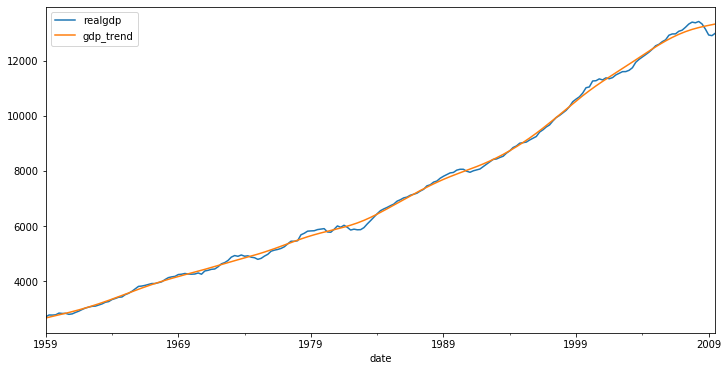

In [19]:
df[['realgdp', 'gdp_trend']].plot(figsize=(12,6))